# Project. MNIST

In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import svm
from matplotlib import pyplot as plt
%matplotlib inline

# MNIST Date Read

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
label = df['label']
df = df.drop(['label'], axis=1)
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Make Images

In [4]:
images = []
for i in range(len(df)):
    img = []
    for j in range(0, 28):
        img.append(df.loc[i].tolist()[j*28:(j+1)*28])
    images.append(img)

# SIFT & Collect Descriptors

In [5]:
sift = cv2.xfeatures2d.SIFT_create()
descriptor = []
for img in images:
    img = np.array(img, dtype=np.uint8)
    kp, des = sift.detectAndCompute(img,None)
    if des != None:
        for feature in des:
            descriptor.append(feature)

/Users/Joohong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [6]:
len(descriptor)

329136

In [7]:
descriptor[0].shape

(128,)

# K Means Clustering for Descriptors

In [8]:
clusters_count = 30
km = KMeans(n_clusters=clusters_count)
km.fit(descriptor)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Classification for Distribution of Descriptors Using SVM

## 1. Train Data

In [9]:
train_X = []
train_y = np.array(label).tolist()
for img in images:
    img = np.array(img, dtype=np.uint8)
    kp, des = sift.detectAndCompute(img,None)
    Dist = [0] * clusters_count
    if des != None:
        result = km.predict(des)
        for cluster in result:
            Dist[cluster] += 10
    train_X.append(Dist)

/Users/Joohong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [10]:
train_X[:5]

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  10,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  10,
  10,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  10,
  0,
  40,
  0,
  0,
  0,
  0,
  10,
  0,
  0,
  0,
  10,
  0,
  0,
  10,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  10,
  0,
  10],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  20,
  0,
  0,
  10,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  10,
  0,
  0,
  0,
  0,
  10,
  0,
  0,
  0,
  10,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  40,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  10,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]]

In [11]:
train_y[:5]

[1, 0, 1, 4, 0]

## 2. Training Support Vector Machine

In [12]:
clf = svm.LinearSVC()
clf.fit(train_X, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## 3. Test Data

In [13]:
test_df = pd.read_csv("data/test.csv")

In [14]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
test_images = []
for i in range(len(test_df)):
    img = []
    for j in range(0, 28):
        img.append(test_df.loc[i].tolist()[j*28:(j+1)*28])
    test_images.append(img)

In [22]:
test_X = []
for img in test_images:
    img = np.array(img, dtype=np.uint8)
    kp, des = sift.detectAndCompute(img,None)
    Dist = [0] * clusters_count
    if des != None:
        result = km.predict(des)
        for cluster in result:
            Dist[cluster] += 10
    test_X.append(Dist)

/Users/Joohong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


## 4. Prediction for Test Data

In [23]:
result = clf.predict(test_X)

In [24]:
output = pd.DataFrame(columns=['ImageId', 'Label'])
output['ImageId'] = [i for i in range(1,len(test_df)+1)]
output['Label'] = result.tolist()

In [25]:
output

,ImageId,Label
0,1,4
1,2,0
2,3,9
3,4,9
4,5,2
5,6,2
6,7,0
7,8,3
8,9,0
9,10,5


## 5. Prediction Result

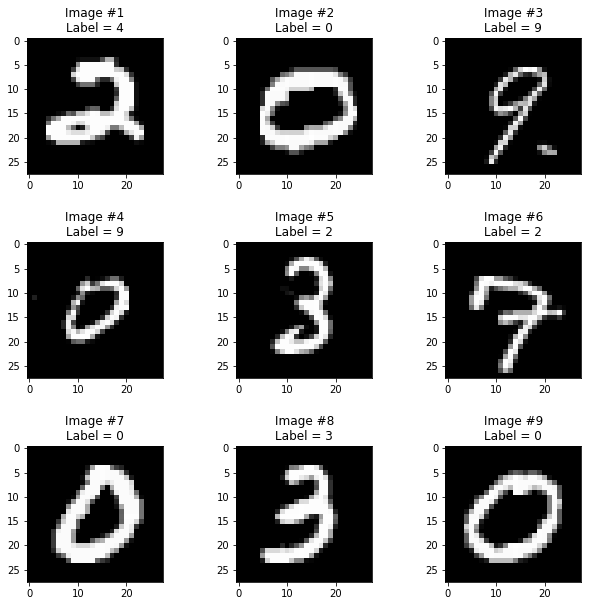

In [26]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gs1 = gridspec.GridSpec(3,3)
gs1.update(wspace=0.5, hspace=0.5)
for i in range(9):
    plt.subplot(gs1[i])
    plt.title("Image #%d\nLabel = %d" % (i+1, output['Label'].loc[i]))
    plt.imshow(test_images[i], 'gray')

## 6. Output

In [27]:
output.to_csv("submission/submission_30_weighted.csv", index=False)